### The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data= pd.read_csv('Advertising.csv')

In [3]:
data.head() # checking the first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [6]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.isna().sum() # finding the count of missing values from different columns

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: xlabel='newspaper', ylabel='sales'>

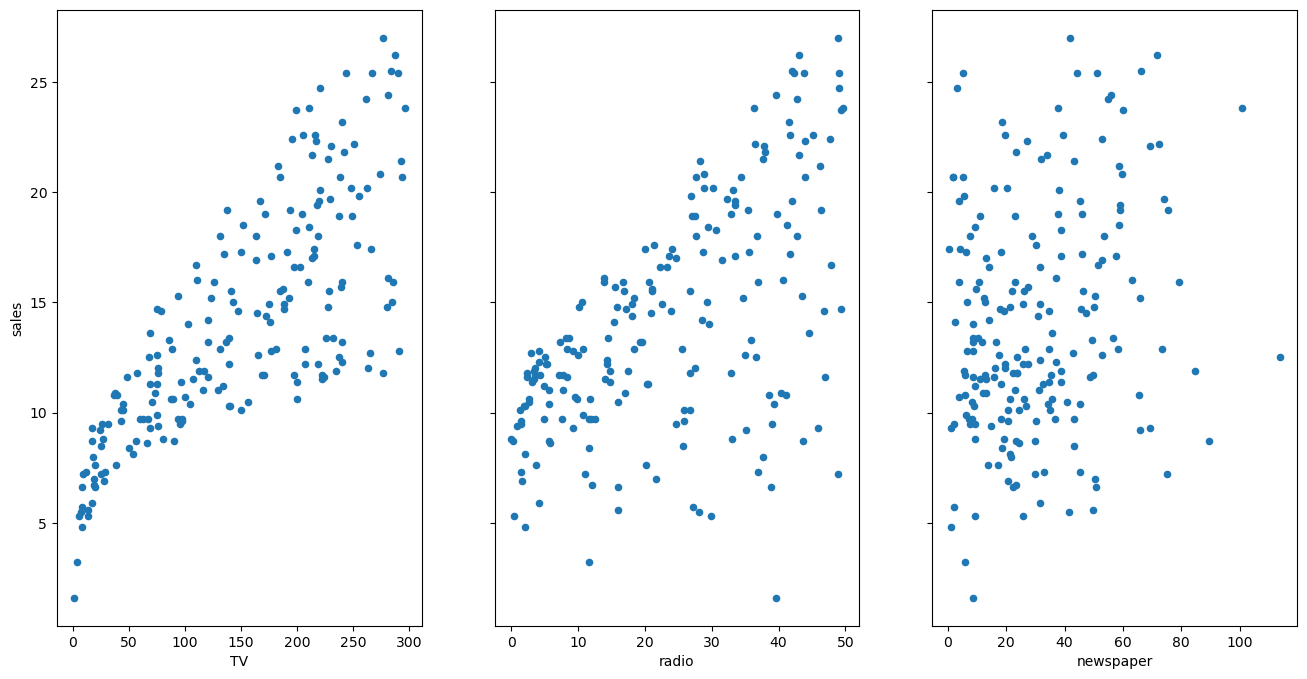

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x ='TV', y ='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x ='radio', y ='sales', ax=axs[1])
data.plot(kind='scatter', x ='newspaper', y ='sales', ax=axs[2])

In [10]:
# Relation Between independent and dependent variable
cor = data.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

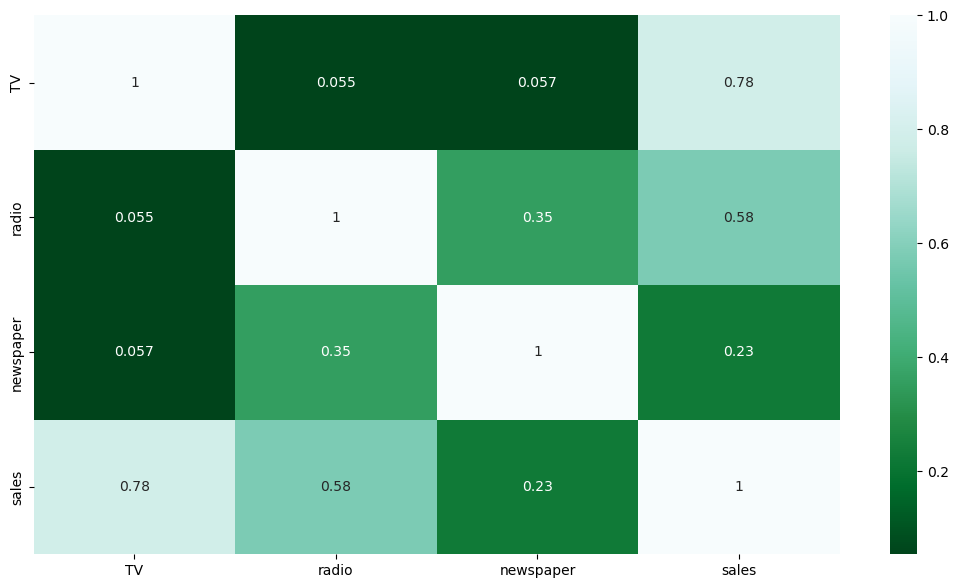

In [11]:
plt.figure(figsize=(13, 7))
sns.heatmap(cor, annot = True, cmap = 'BuGn_r')

## Data Pre-processing (Splitting)

In [12]:
# create X and y
#feature_cols = ['TV']
X = data.drop('sales', axis = 1)  # Features
y = data.sales                    # Target Variable

In [13]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [14]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X-train and Y-train is used for training the model.
# X-test  is used for prediction.
# Y-test is used for evaluation.

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 3), (160,), (40, 3), (40,))

In [19]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


## Model Building & Evaluation

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 

reg.fit(X_train,y_train) #Fit the training data on a Linear Regression Model

LinearRegression()

In [18]:
# checking the weights

reg.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [19]:
# CHECKING BIAS 

reg.intercept_

2.9790673381226274

In [20]:
# Making Prediction on test data

y_pred = reg.predict(X_test)

In [21]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [22]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

In [23]:
# Evaluation

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.4607567168117606
MSE: 3.1740973539761046
RMSE: 1.7815996615334502


C:\Users\Asus\AppData\Local\Temp\ipykernel_5972\963874834.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='sales', ylabel='Density'>

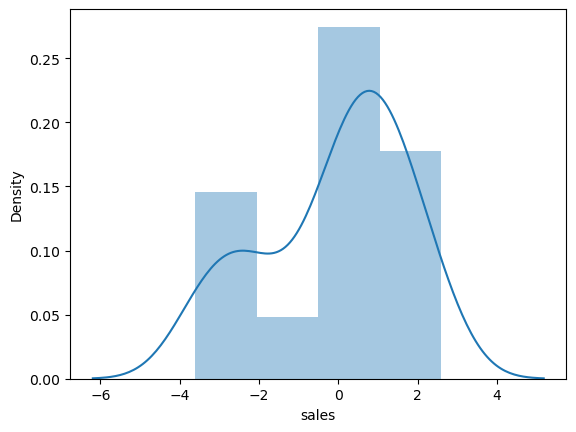

In [24]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

### Result: ***My Model is able to explain 90 % of the total data set.***

## Polynomial Regression





In [29]:
#importing the dataset
dataset= pd.read_csv('6146991_1_ass1--1-.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head()  

,Unnamed: 0,Parents Income (AUD in 1000),Child Performance (%)
0,0,41.710999,30.384435
1,1,31.693796,30.777919
2,2,88.897711,70.979134
3,3,33.405135,30.691995
4,4,45.811534,34.269668


In [30]:
dataset.shape

(2000, 3)

In [31]:
x = dataset['Parents Income (AUD in 1000)']
x = np.array(x)
y = dataset['Child Performance (%)']

<Axes: xlabel='Parents Income (AUD in 1000)', ylabel='Child Performance (%)'>

<Figure size 1200x600 with 0 Axes>

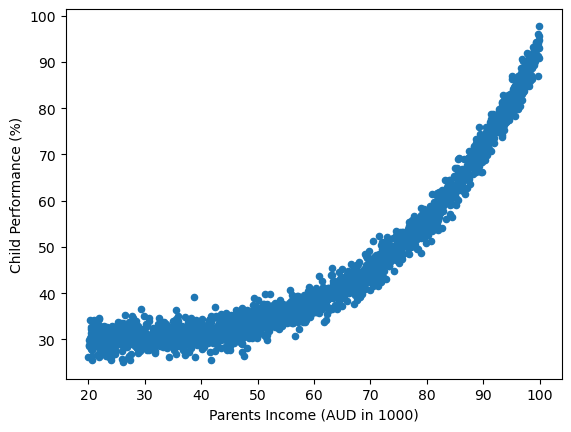

In [32]:
# visualize the relationship between the features and the response using scatterplots
#fig, axs = plt.subplots(1, 3, sharey=True)
plt.figure(figsize=(12, 6))
dataset.plot(kind='scatter', x='Parents Income (AUD in 1000)', y='Child Performance (%)')

In [33]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1,1), y)

LinearRegression()

In [34]:
y_pred = lin_reg.predict(x.reshape(-1, 1))

In [35]:
# creating pipeline and fitting it on data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [36]:
poly_pred = pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

In [37]:
x_poly

(20.006693966609728,
 20.163378499178435,
 20.18500289089456,
 20.18995724883327,
 20.20874262499122,
 20.229855016542217,
 20.26637971542925,
 20.382714348340976,
 20.40508841574449,
 20.40572568513173,
 20.42169199775744,
 20.43221264657494,
 20.43518950886565,
 20.45337874920702,
 20.469252255644108,
 20.49260824672392,
 20.559155062085104,
 20.64165880097036,
 20.648266364244108,
 20.71741281107977,
 20.73429629583277,
 20.77824781743063,
 20.809793464986196,
 20.92014269172907,
 20.922005545293043,
 20.957167769498252,
 21.00025680713415,
 21.046580365721358,
 21.05131038343483,
 21.057691906038272,
 21.21452291773867,
 21.258877651123058,
 21.284661256068507,
 21.30925835827454,
 21.311968808949054,
 21.322756543366232,
 21.339576543908912,
 21.486808908357915,
 21.53027232877361,
 21.552473078038208,
 21.620067563541923,
 21.704015954575706,
 21.74065966607572,
 21.75696755829791,
 21.81470668714126,
 21.82005259972236,
 21.82681740900774,
 21.877852778317155,
 21.89188748426130

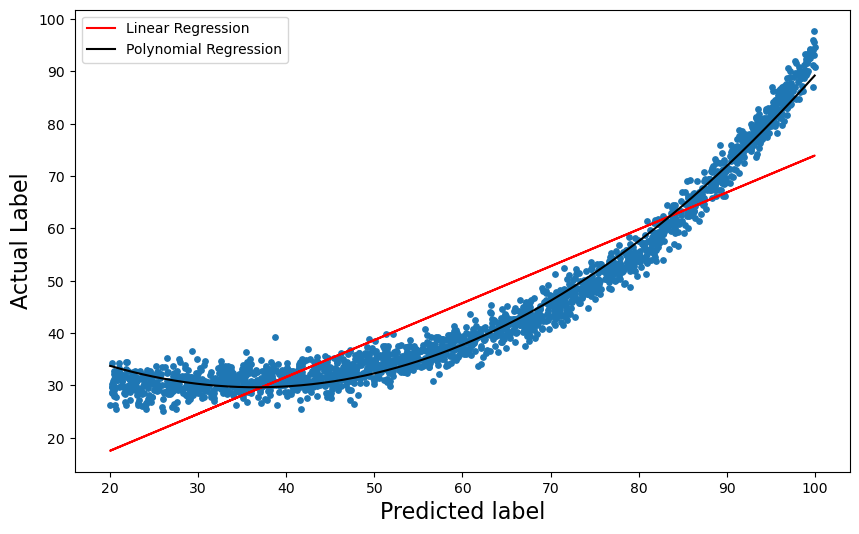

In [38]:
#plotting predictions
plt.figure(figsize=(10,6))

plt.scatter(x,y,s=15)

plt.plot(x,y_pred,color='r',label='Linear Regression')

plt.plot(x_poly,poly_pred,color='black',label='Polynomial Regression')

plt.xlabel('Predicted label',fontsize=16)
plt.ylabel('Actual Label',fontsize=16)
plt.legend()
plt.show()